In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas Visualization

In [2]:
# first, lets create a simple, example dataframe
    #this accumulates the value for each element of the array

df = pd.DataFrame({"a": np.random.randn(365).cumsum(),
                  "b": np.random.randn(365).cumsum() + 20,
                  "c": np.random.randn(365).cumsum() + 40},
                  index = pd.date_range(pd.Timestamp.now(), periods=365))

# the normalize method of a datetimeindex sets everything as a regular date
df.index = df.index.normalize()
df.head()

,a,b,c
2021-02-20,0.711547,19.007838,41.922534
2021-02-21,0.094044,20.308996,41.958141
2021-02-22,1.130765,19.012515,41.187436
2021-02-23,0.754419,18.558086,40.959596
2021-02-24,2.772098,18.312589,40.728757


In [3]:
# we can change the plotting styles of matplotlib and pandas
    ## here we visualize the available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
# setting style as per lecture
plt.style.use("seaborn-colorblind")

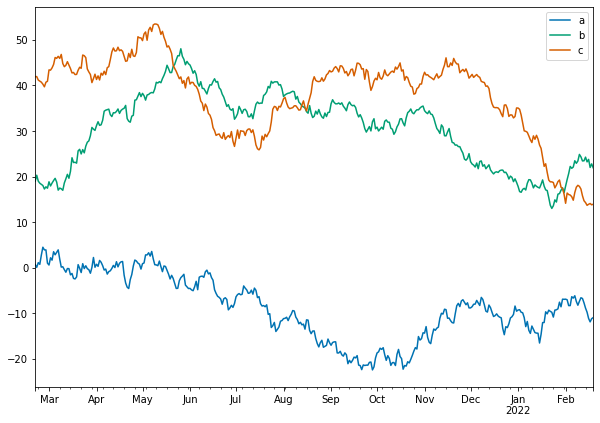

In [5]:
# to plot the data, we use the plot method of the dataframe.
# the ;  at the end prevents the text output in the notebook
df.plot(figsize=(10,7));

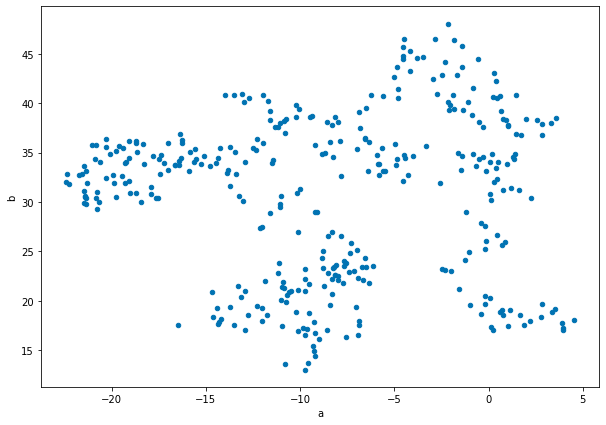

In [6]:
# we can also use othher types of plots
df.plot("a","b", kind="scatter", figsize=(10,7));

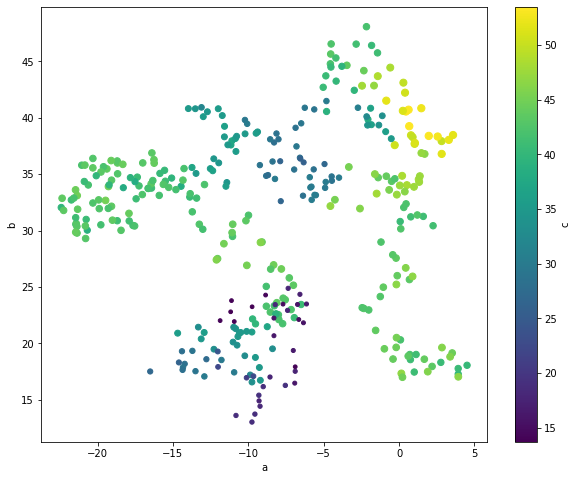

In [7]:
# we can also pass the kind as an argument
    # in this other example we'll set the color and size depending on the value of c
#df.plot.scatter("a","b", c="c", s=df["c"], cmap="viridis", figsize=(10,8))
df.plot("a", "b", kind="scatter", s="c", c="c", cmap="viridis", figsize=(10,8), sharex=False);

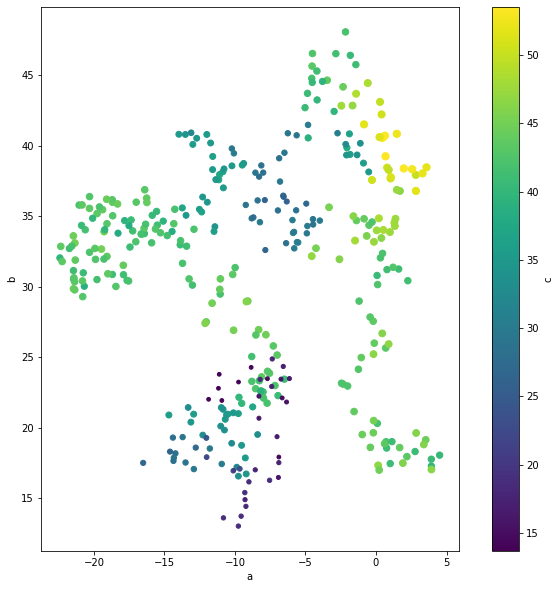

In [8]:
#just like in matplotlib, we can store a plot generation
# the share x FALSE fixes the x ticks label issues!!
ax = df.plot.scatter("a","b", c="c", s=df["c"], cmap="viridis", figsize=(12,10), sharex=False)

#then we can change attributes of it
ax.set_aspect("equal")
              
plt.savefig("scatter.jpg")

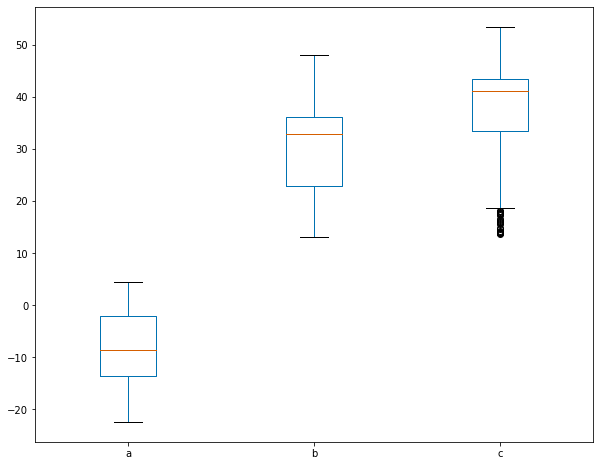

In [9]:
# we can also create boxplots
df.plot.box(figsize=(10,8));

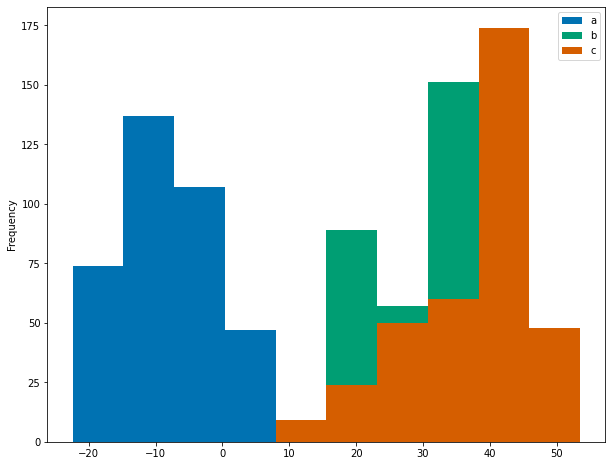

In [10]:
# histograms
df.plot.hist(figsize=(10,8));

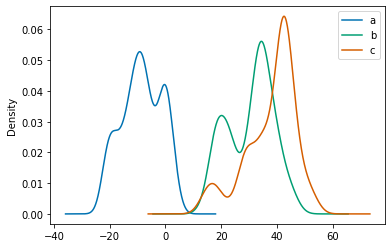

In [11]:
# and probability density functions (kurve density)
df.plot.kde();

In [12]:
# loading sample df
df = pd.read_csv("data/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


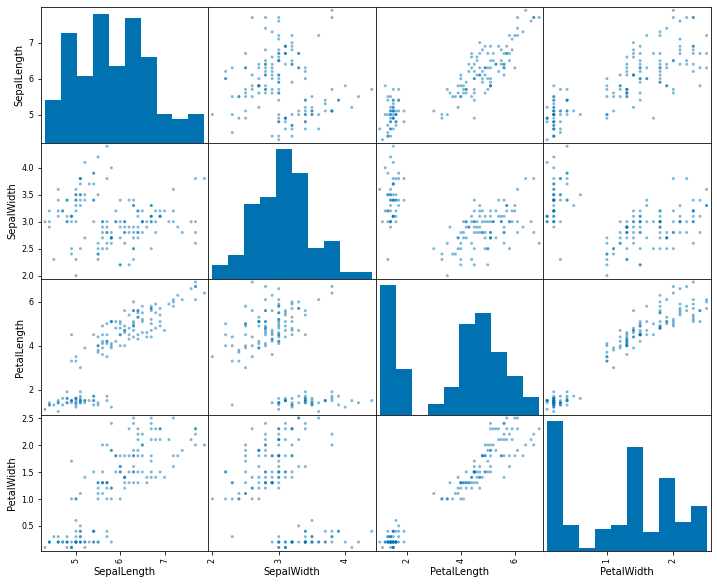

In [13]:
# we can also plot multivariate data that creates a SCATTERED MATRIX (comparing each to another column)
pd.plotting.scatter_matrix(df, figsize=(12,10));

<AxesSubplot:>

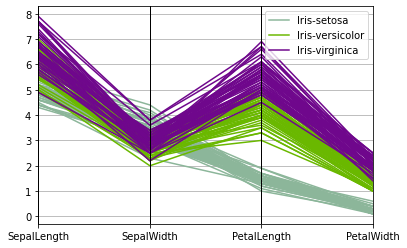

In [14]:
# and also paralallel plots
pd.plotting.parallel_coordinates(df,"Name")

# Seaborn

In [15]:
import seaborn as sns

In [16]:
# seaborn allows for more statistically intricate visualizations

# in this exmaple we are creating 2 "normally" distributed sampples

v1 = pd.Series(np.random.normal(0,10,1000), name="v1")
v2 = pd.Series(2* np.random.normal(20,10,1000), name="v2")

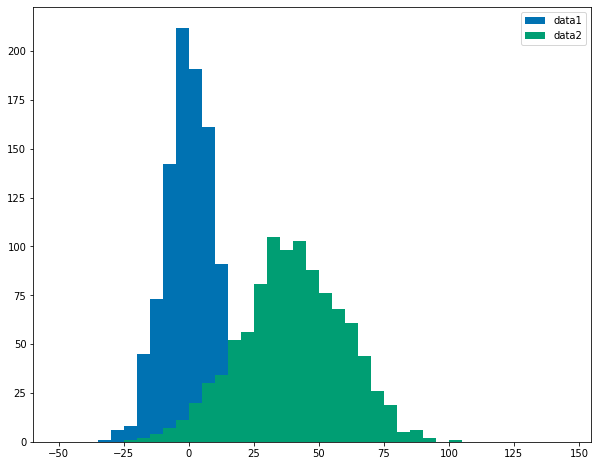

In [17]:
plt.figure(figsize=(10,8))


# we can also set the bins to be a range to equalize everything
plt.hist(v1, bins = np.arange(-50, 150, 5), label="data1")
plt.hist(v2, bins = np.arange(-50, 150, 5), label="data2")


# merely importing seaborn changes the aesthetics
plt.legend();

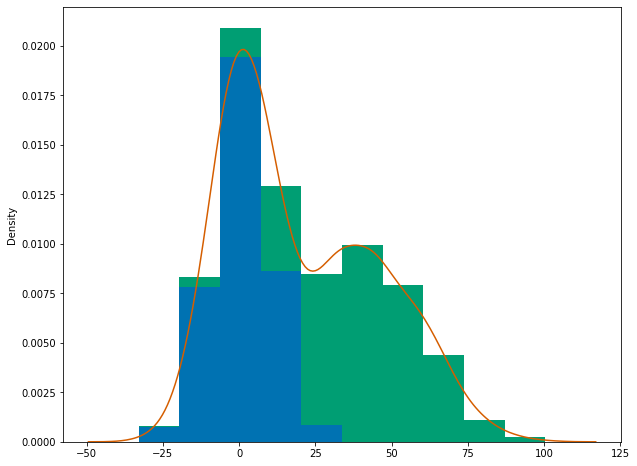

In [18]:
# another plot
plt.figure(figsize=(10,8))

#passing both as a list saves the step of making 2 charst. barstack stacks one on top of another
    ## density sets the Y axis to be the probability of a value
plt.hist([v1, v2], histtype="barstacked", density=True);

# concatenating (appending) both series puts the values in order
v3 = pd.concat((v1,v2))

#creates a probability density curve
sns.kdeplot(v3);

<AxesSubplot:ylabel='Density'>

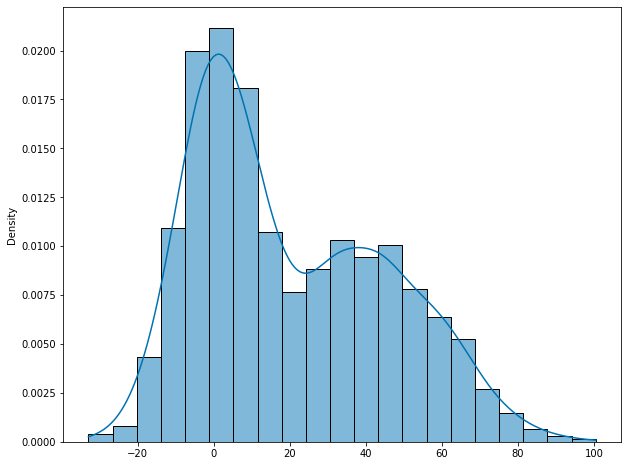

In [19]:
plt.figure(figsize=(10,8))

# another way to do a similar plot
sns.histplot(v3, stat="density", kde=True)

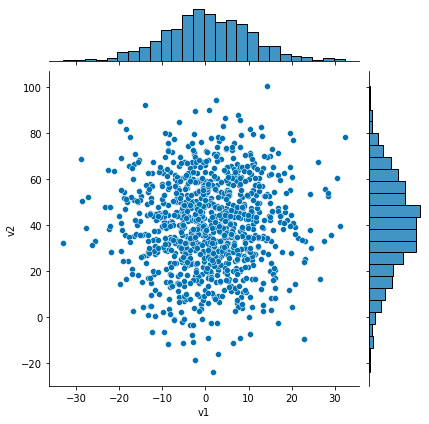

In [20]:
# joint plots are much more complex but also much more powerful
    # this creates a scatter grid and histogram

sns.jointplot(x=v1, y=v2);

<Figure size 720x576 with 0 Axes>

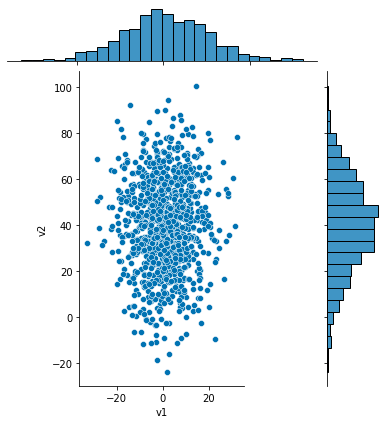

In [23]:
# since mpl is used, we can tweak its attributes
plt.figure(figsize=(10,8))

# jointplot returns a seaborn grid object
grid = sns.jointplot(x=v1, y=v2)

# and we can edit its properties to equalize everything
grid.ax_joint.set_aspect("equal");

<Figure size 720x576 with 0 Axes>

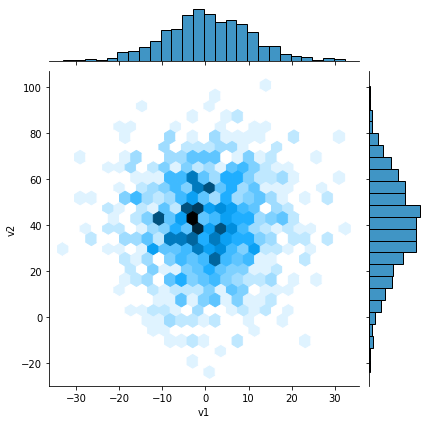

In [26]:
# since mpl is used, we can tweak its attributes
plt.figure(figsize=(10,8))

# we can also create hexagram shaped plots

sns.jointplot(x=v1, y=v2, kind="hex");

In [30]:
# to change styles we can use sns.styles

sns.set_style("white")

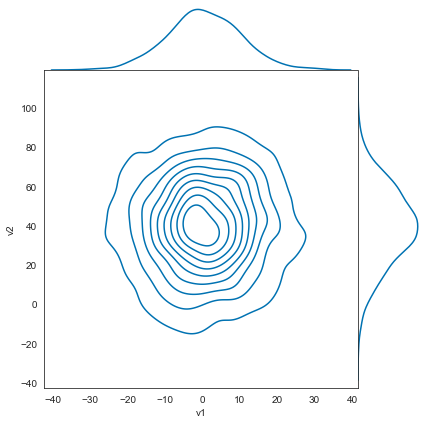

In [31]:
sns.jointplot(x=v1, y=v2, kind="kde", space=0);

In [32]:
# loading sample df
df = pd.read_csv("data/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


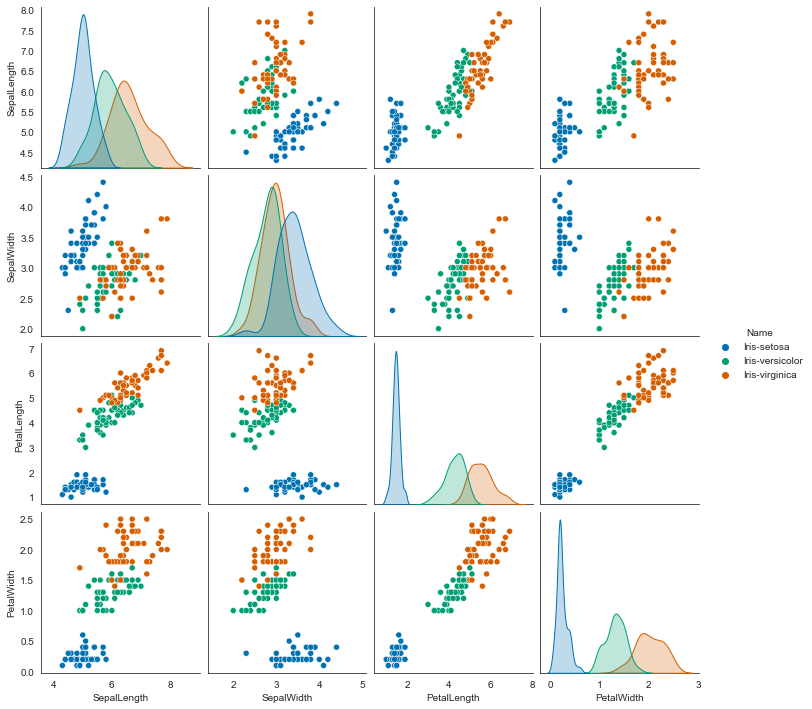

In [38]:
# seaborn can also create scatter matrixes just like pandas
    ## hue sets the colors based on the name
    ## diag_kind sets the diagonal graphs. in this case to kumulative desnity
sns.pairplot(df, hue="Name", diag_kind="kde");

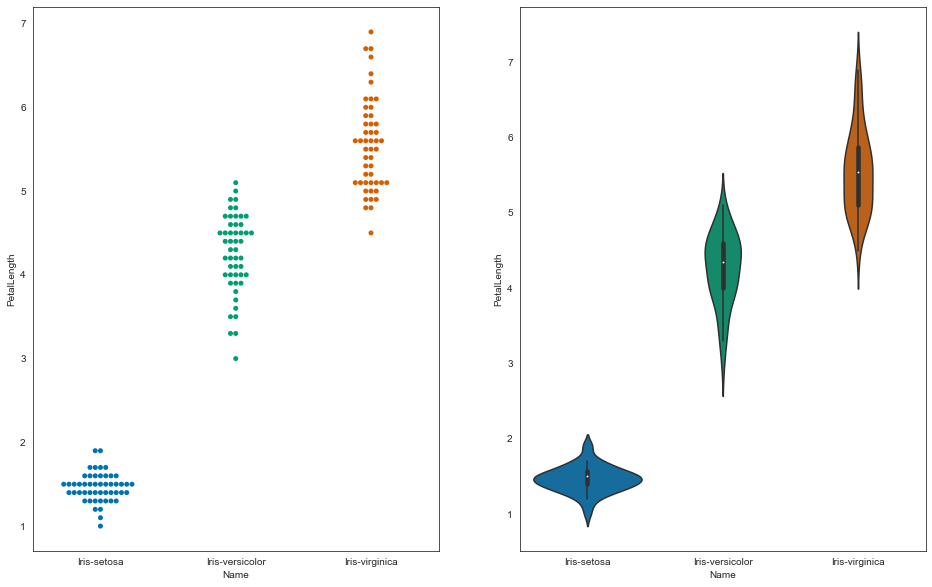

In [45]:
# violin plot is a more informative version of a boxplot

plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
#this is a scatterplot for categorical data
sns.swarmplot(x="Name", y="PetalLength", data=df)

plt.subplot(1,2,2)
#this is a boxplot for categorical data
sns.violinplot(x="Name", y="PetalLength", data=df);